<a href="https://colab.research.google.com/github/sshradd/quantUX/blob/main/Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weight: nan
Bias: nan


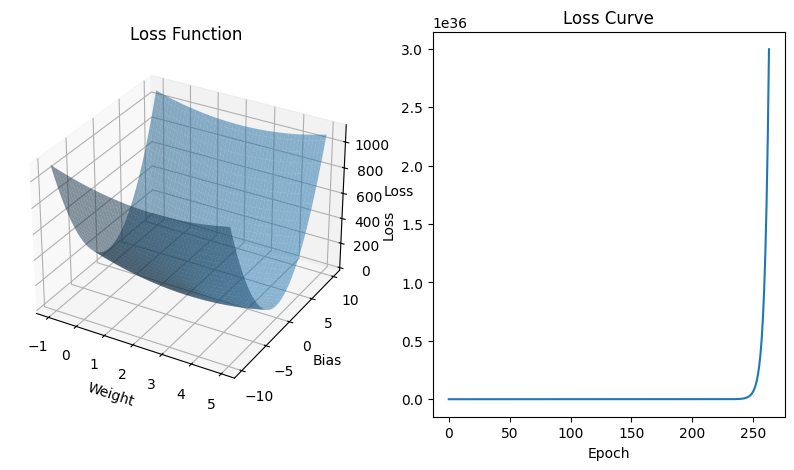

In [6]:
# prompt: linear regression pytorch example with 3d loss function visualization

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X = torch.randn(100, 1) * 10
y = 2*X + 1 + torch.randn(100, 1)

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the learned parameters
print('Weight:', model.linear.weight.item())
print('Bias:', model.linear.bias.item())

# Visualization of the loss function
w = np.linspace(-1,5,100)
b = np.linspace(-10,10,100)
W, B = np.meshgrid(w,b)

L = []
for wi in w:
    l = []
    for bi in b:
        ypred = wi*X + bi
        l.append(criterion(ypred, y).item())
    L.append(l)
L = np.array(L)


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(W,B,L,alpha=0.5)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Function')


ax2 = fig.add_subplot(122)
ax2.plot(losses)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Loss Curve')


plt.show()


In [11]:
# prompt: pytorch simple sentiment analysis Example

import torch
import torch.nn as nn
import torch.optim as optim

# Sample sentences and labels (0 for negative, 1 for positive)
sentences = [
    "This movie was fantastic!",
    "I hated this movie.",
    "The acting was terrible.",
    "A truly great film.",
    "I loved it!"
]
labels = [1, 0, 0, 1, 1]


# Create a vocabulary
vocab = set()
for sentence in sentences:
    for word in sentence.lower().split():
        vocab.add(word)

word_to_index = {word: index for index, word in enumerate(vocab)}

# Convert sentences to numerical representations (bag-of-words)
def sentence_to_vector(sentence):
  vector = torch.zeros(len(vocab))
  for word in sentence.lower().split():
    if word in word_to_index:
      vector[word_to_index[word]] = 1
  return vector

X = torch.stack([sentence_to_vector(sentence) for sentence in sentences])
y = torch.tensor(labels, dtype=torch.float32).reshape(-1, 1) # Reshape for binary classification

# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_size):
        super(SentimentClassifier, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

model = SentimentClassifier(len(vocab))


# Define the loss function and optimizer
criterion = nn.BCELoss() #Binary Cross Entropy for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Example prediction
test_sentence = "This movie is amazing"
test_vector = sentence_to_vector(test_sentence)
with torch.no_grad():
  prediction = model(test_vector)
  print(f"Sentiment prediction for '{test_sentence}': {prediction.item():.4f}") # Output should be close to 1 (positive)




Epoch [100/1000], Loss: 0.5378
Epoch [200/1000], Loss: 0.4525
Epoch [300/1000], Loss: 0.3893
Epoch [400/1000], Loss: 0.3405
Epoch [500/1000], Loss: 0.3017
Epoch [600/1000], Loss: 0.2703
Epoch [700/1000], Loss: 0.2443
Epoch [800/1000], Loss: 0.2225
Epoch [900/1000], Loss: 0.2041
Epoch [1000/1000], Loss: 0.1882
Sentiment prediction for 'This movie is amazing': 0.7090
